In [25]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
X,y = load_diabetes(return_X_y = True)

In [26]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [27]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [28]:
X.shape

(442, 10)

In [29]:
regressor = DecisionTreeRegressor(random_state =0)

In [30]:
prediction = cross_val_score(regressor,X,y,cv=10)  #R^2 value

In [31]:
import numpy as np
np.mean(prediction)
#very very poor

-0.20436414276291687

DEcision tree visualisation & hypernparameter tuning

In [33]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris


In [34]:
iris = load_iris()

In [35]:
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target, test_size=0.3)

In [36]:
model = DecisionTreeClassifier()

In [37]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [38]:
y_pred = model.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9111111111111111

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
param_grid = {
    'max_depth' :[3,4,5,6],
    'min_samples_split' : [2,3,4,5],
    'min_samples_leaf': [1,2,3]
}

In [42]:
grid_search = GridSearchCV(estimator=model,param_grid=param_grid,cv=3)

In [43]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5]})

In [44]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=3)

In [45]:
grid_search.best_params_

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [46]:
model2 = DecisionTreeClassifier(max_depth= 6, min_samples_leaf= 1, min_samples_split= 2)

In [47]:
model2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [48]:
y_pred1 = model2.predict(X_test)

In [49]:
accuracy_score(y_test,y_pred1)

0.9111111111111111

[Text(0.4, 0.9, 'x[2] <= 2.45\ngini = 0.664\nsamples = 105\nvalue = [35, 39, 31]'),
 Text(0.2, 0.7, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.6, 0.7, 'x[3] <= 1.75\ngini = 0.493\nsamples = 70\nvalue = [0, 39, 31]'),
 Text(0.4, 0.5, 'x[2] <= 4.95\ngini = 0.093\nsamples = 41\nvalue = [0, 39, 2]'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]'),
 Text(0.6, 0.3, 'x[0] <= 6.5\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 29\nvalue = [0, 0, 29]')]

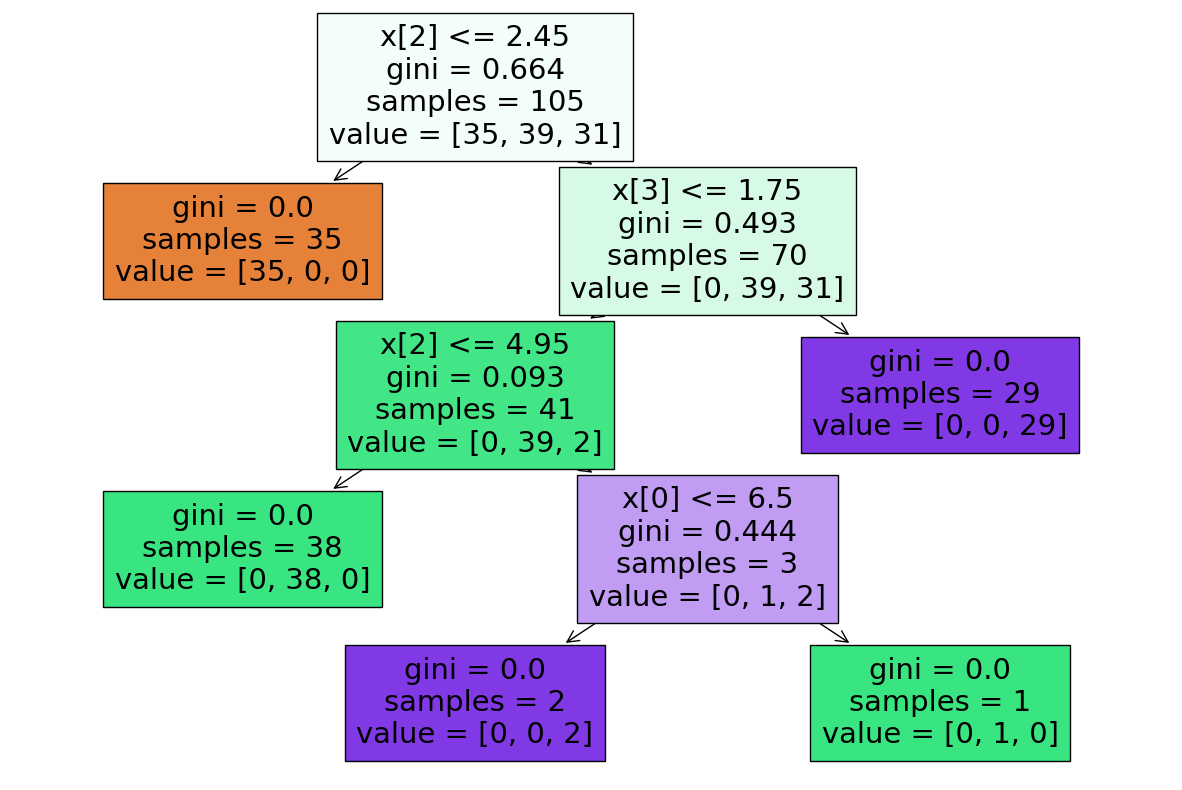

In [53]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model2,filled=True)

gini impurity is 0 because it is a leaf node

What is Decison Tree & how it works ?

It is supervised ML agorithm, which works for both classification and regression , it partition the data ,it apply some sort of conditioning on top of the data , in an iterative manner again and again , until we not going to build a complete tree

working : discussed in the class

........................................

Q2 what are the different type of algorithm for the decision tree?

CART , ID3 , C4.5(homework),
CHAID(based on chi square test)

..........................................

Q3 Does missing vlaue impact decision tree ? No or yes ?

if there are lot of missing vlaues, so definietly it will impact to the Decision tree

first handle missing value and then go for the model building

.........................................

Q4 What is overfitting . How we can prevent it ith the help of decision tree ?

training accuracy will be very very high , and testing accuracy will low . we can prevent it

Pruning

Ensemble method (RF , AB, XB, GBM)

..........................................

Q5 What is the pruning in the decision tree and how we perform it

Pre Pruning : we can perform hyperparameter tu ing with different parameters

post Pruning : discussed later

.........................................

Q6 can you explain the concept of impurity (ginni) and how you measure it ?

Q7 if people is talking about impurity you can talk about the entropy as well ?

Entropy : it is measure of randomness , we don't tell directly that this is entropy , we showcase the result in terms of information gain

..........................................

Q8 What is difference between gini impurity and entropy , and which one should i use ?

Q9 Hoe you can evaluate the performance of decison tree ?

Based on confusion matrix = accuracy , precison, recall , F1 score , auc-roc curve

if it comes for the regression , so loss wise i can use var(MSE) as a final matrix i can use r2 and adjacent 2

..........................................

Q10 what is the disadvantage and advantages of using decision tree ?

easy to understand and interpret

able to handle both categorical as well as numeric data

able to handle both categorical as well as numeric data

able to handle outlier

no need to do scaling

non parametric (they don't make assumptions about underlining disctinguishing of the data , here we are not going to form any equation , here we are just going to decide the struucture of the tree

fast and scalable (according to requirement we can prune it)


Disadvantage:

overfitting

sensitive : if there is any complex pattern of data then it would n't perform well

it is sensitive to misssing value

if there are missing value , then it can lead to wrong prediction

for the large data set it would n't good

..................................................................

Q11 How to use decision tree for feature selection?

if there is less impurity then it will be the most important feature

cells which are present at the top of the decison tree are more important feature then below cells

.....................................................

Q12 If my data is imbalanced then should i use the Dt and its robust to DT?

first handle the imbalance data and then go for the building up this DT.

10 ==> 8 yes and 2 no

if you are giving such data to decision  tree it might lead to wrong prediction

Q10 can you give me those scenario there i should not use DT?

can you tell them disadvantage?

we never use decison tree alone , we always use random forest, ansemble technique means we use multiple models

Q what if we have two target column ?

in that case , we take two models

Q What is post pruning?

first we are  building the entire tree till complete depth , and then we are going to prune it
